In [47]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [48]:
#Adjusting Figure Size in Matplotlib

plt.rcParams["figure.figsize"] = (18,8) # Setting the size of the images used here.

In [49]:
# Load the datasets

train = pd.read_csv('train.xls', parse_dates=['Date'])  # Training data
features = pd.read_csv('features.xls', parse_dates=['Date']) # Features
stores = pd.read_csv('stores.xls')  # Store Details
test = pd.read_csv('test.xls')  # test Details


In [50]:
#Merging Training Data with Store Details

train_stores= pd.merge(left=train, right=stores, how='left', on='Store')  # Merging Train data and Stores Details

In [51]:
#Merging Train Data, Store Details, and Features

df = pd.merge(left=train_stores, right=features, how='left', on=['Store','Date','IsHoliday'])  # Merging Train data, Stores and Features
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [52]:
#Displaying the Number of Rows and Columns in the DataFrame

print(f'Total number of rows --> {df.shape[0]}')
print(f'Total number of columns --> {df.shape[1]}')

Total number of rows --> 421570
Total number of columns --> 16


In [53]:
df.info()  # Information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [54]:
df.describe().T  # Five Point Summary

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Size,421570.0,136727.915739,34875.0,93638.0,140167.0,202505.0,219622.0,60980.583328
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,150681.0,7246.420196,0.27,2240.27,5347.45,9210.9,88646.76,8291.221345
MarkDown2,111248.0,3334.628621,-265.76,41.6,192.0,1926.94,104519.54,9475.357325
MarkDown3,137091.0,1439.421384,-29.1,5.08,24.6,103.99,141630.61,9623.07829


In [55]:
df.columns   # Columns present in the dataset

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

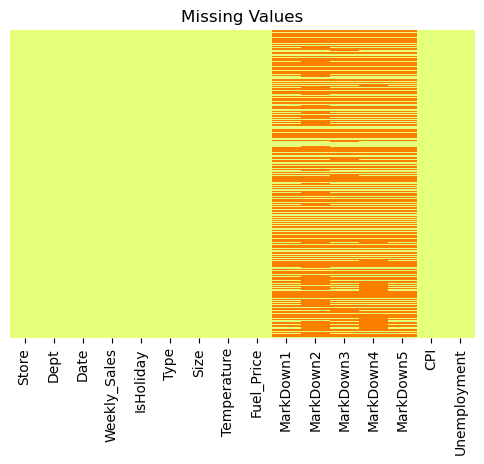

In [56]:
#Plotting a heatmap to check the missing values
plt.figure(figsize=(6, 4)) 
sns.heatmap(data = df.isna(), yticklabels=False, cbar=False, cmap='Wistia')
plt.title('Missing Values')
plt.show()

In [57]:
#Number of missing values

df.isna().sum().sort_values(ascending=False).head()


MarkDown2    310322
MarkDown4    286603
MarkDown3    284479
MarkDown1    270889
MarkDown5    270138
dtype: int64

In [58]:
#Percentage of missing values

df.isna().sum().sort_values(ascending=False).head()/df.shape[0]*100

MarkDown2    73.611025
MarkDown4    67.984676
MarkDown3    67.480845
MarkDown1    64.257181
MarkDown5    64.079038
dtype: float64

In [59]:
#Imputing the missing values with 0 as it means there is no discount available there

df.fillna(0, inplace=True)

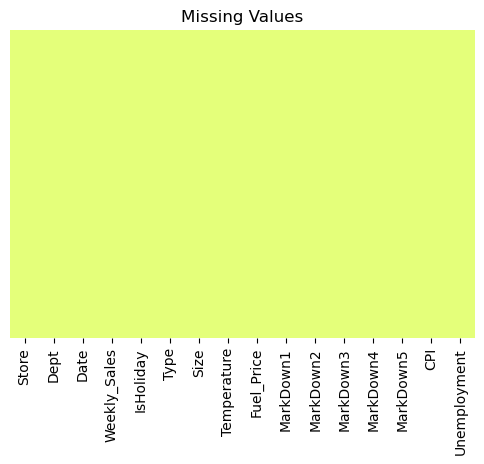

In [60]:
#Plotting a heatmap again to confirm that there are no missing values
plt.figure(figsize=(6, 4)) 
sns.heatmap(data = df.isna(), yticklabels=False, cbar=False, cmap='Wistia')
plt.title('Missing Values')
plt.show()

In [61]:
#Creating a DataFrame for Markdowns and Weekly Sales, and
#Adding a Column to Indicate the Presence of Markdown

df_markdown = df[['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5', 'Weekly_Sales']].copy()  # Creating a new dataframe with all MarkDowns and Weekly Sales.
df_markdown['Is_MarkDown'] = df_markdown.iloc[:,0:5].sum(axis=1).apply(lambda x: 0 if x == 0 else 1) # Add one new column is_MarkDown

In [62]:
#Separating Weekly Sales Based on the Presence of MarkDown

df_is_markdown = df_markdown.loc[df_markdown['Is_MarkDown']==1, 'Weekly_Sales']  # Weekly Sales with MarkDown
df_no_markdown = df_markdown.loc[df_markdown['Is_MarkDown']==0, 'Weekly_Sales']  # Weekly Sales without MarkDown

In [63]:
# NUmber of records with and without MarkDown

df_is_markdown.shape, df_no_markdown.shape  

((151432,), (270138,))

In [64]:
print(f'Average Weekly Sales with Markdown --> {df_is_markdown.mean():.2f}\nAverage Weekly Sales without Markdown --> {df_no_markdown.mean():.2f}')

Average Weekly Sales with Markdown --> 16177.02
Average Weekly Sales without Markdown --> 15871.52


In [65]:
# Two Sample Independent T Test performed on weekly sales with MarkDown and
#weekly sales without MarkDown

ttest_ind(df_is_markdown, df_no_markdown)  # Two Sample Independent T Test performed on weekly sales with MarkDown andd weekly sales without MarkDown

TtestResult(statistic=np.float64(4.190223302926926), pvalue=np.float64(2.7873670493605033e-05), df=np.float64(421568.0))

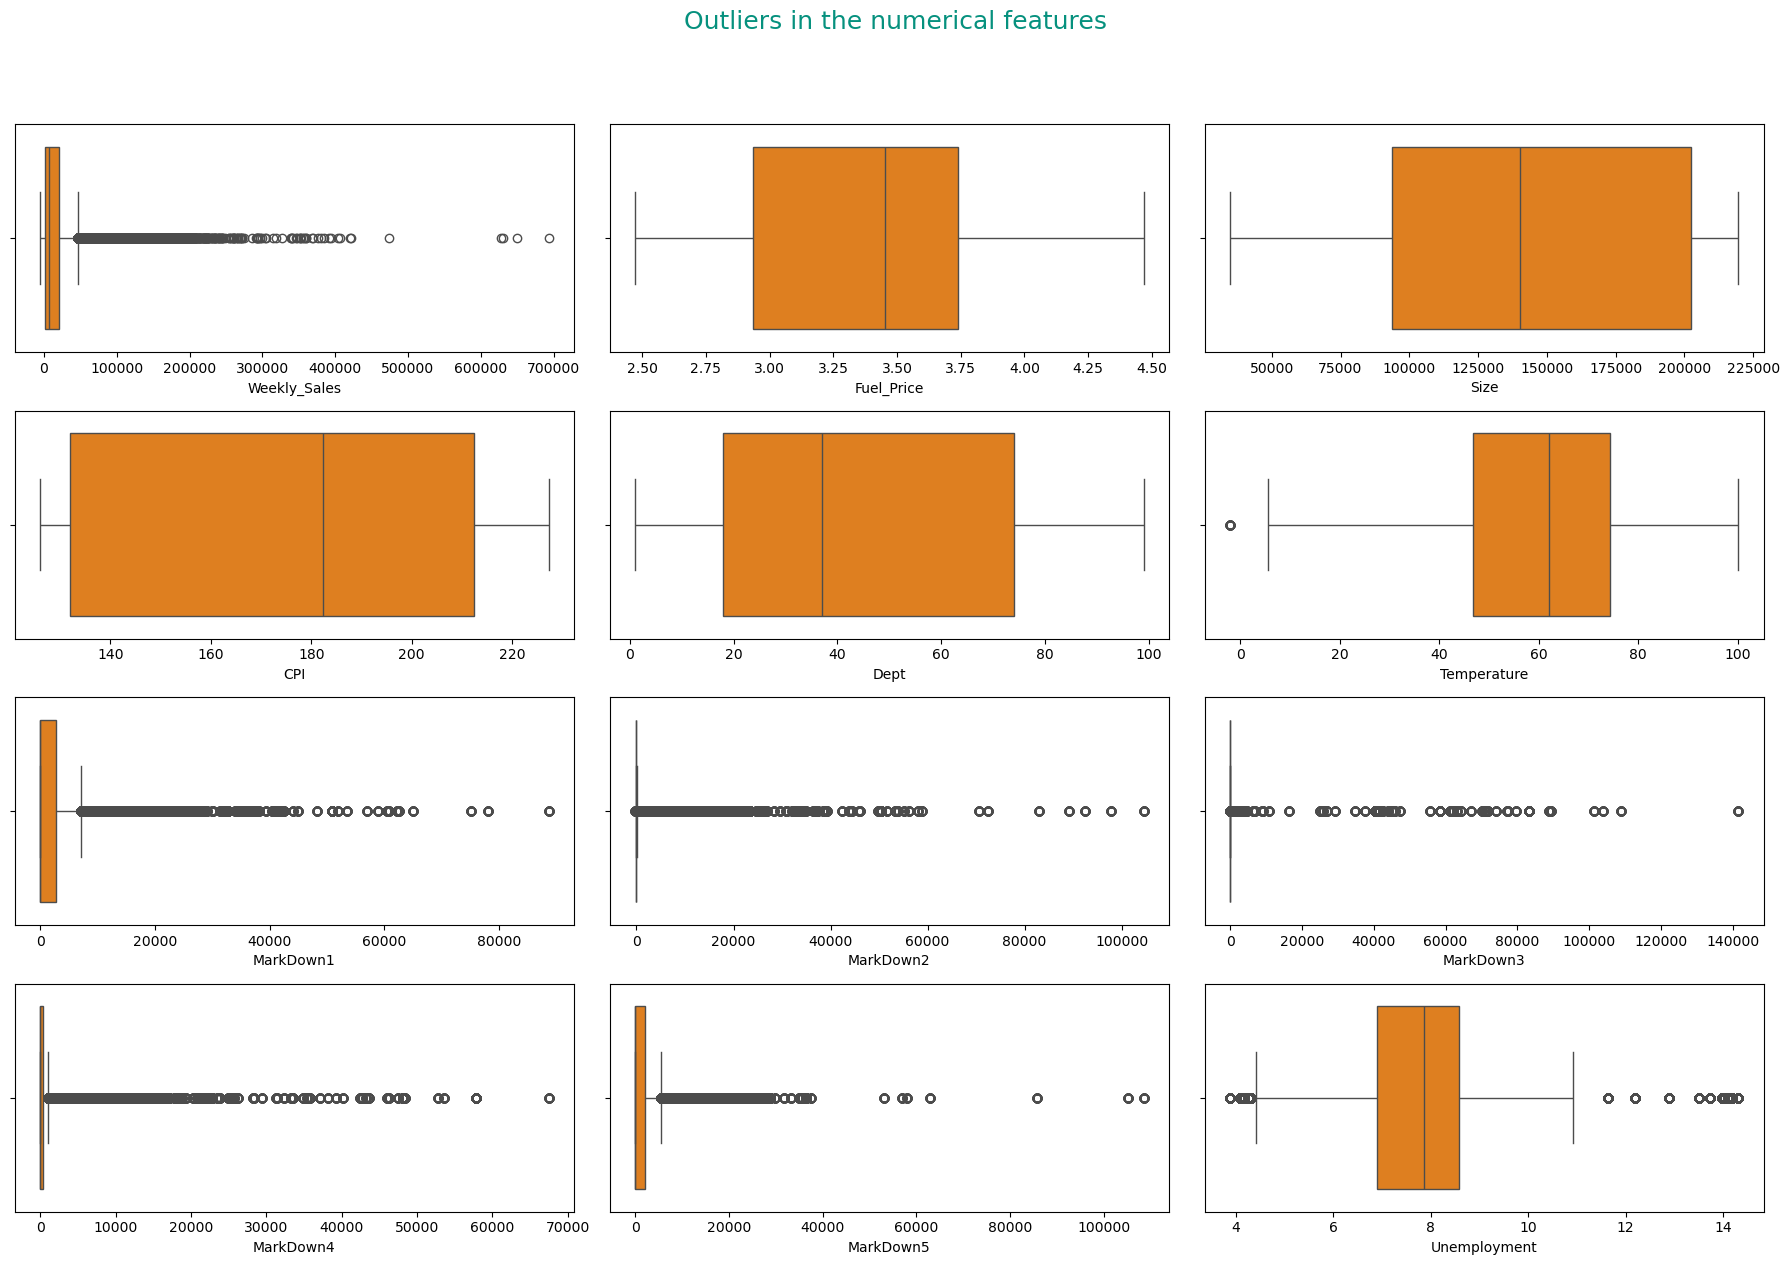

In [66]:
#Visualizing Outliers in Numerical Features
import warnings
warnings.filterwarnings("ignore")
cols_outlier = df[['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'Unemployment']]
fig, axes = plt.subplots(4,3,figsize=(18,12))
fig.suptitle('Outliers in the numerical features',fontsize=18, color = '#06917e', x = 0.5, y = 1.05)
index = [(i,j) for i in range(4) for j in range(3)]
index_count=0
for col in cols_outlier.columns:
    sns.boxplot(x=col, ax=axes[index[index_count]], data=df, palette='afmhot_r')
    index_count += 1
    plt.tight_layout()
plt.show()

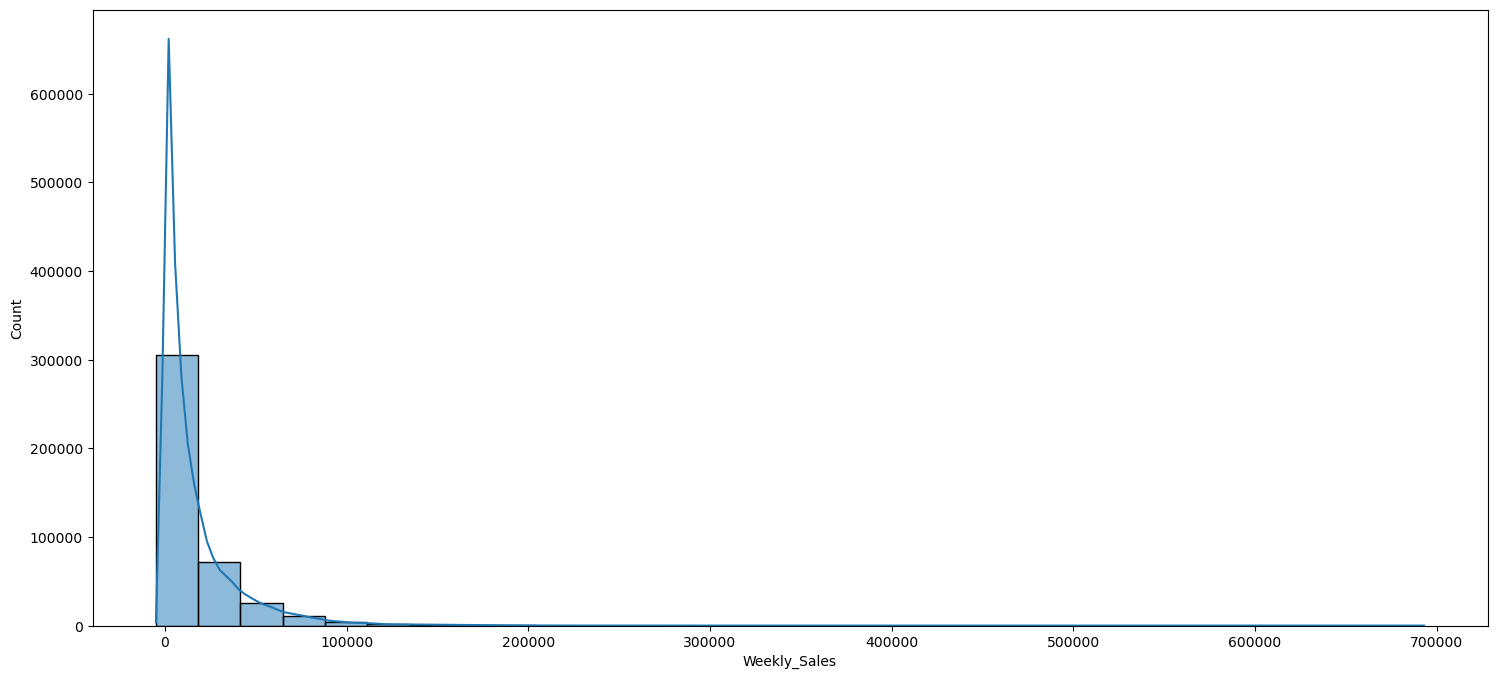

In [67]:
#Visualizing the Distribution of Weekly Sales

sns.histplot(x=df['Weekly_Sales'], bins=30, kde=True)  # Distribution of Target Variable 'Weekly_Sales'
plt.show()

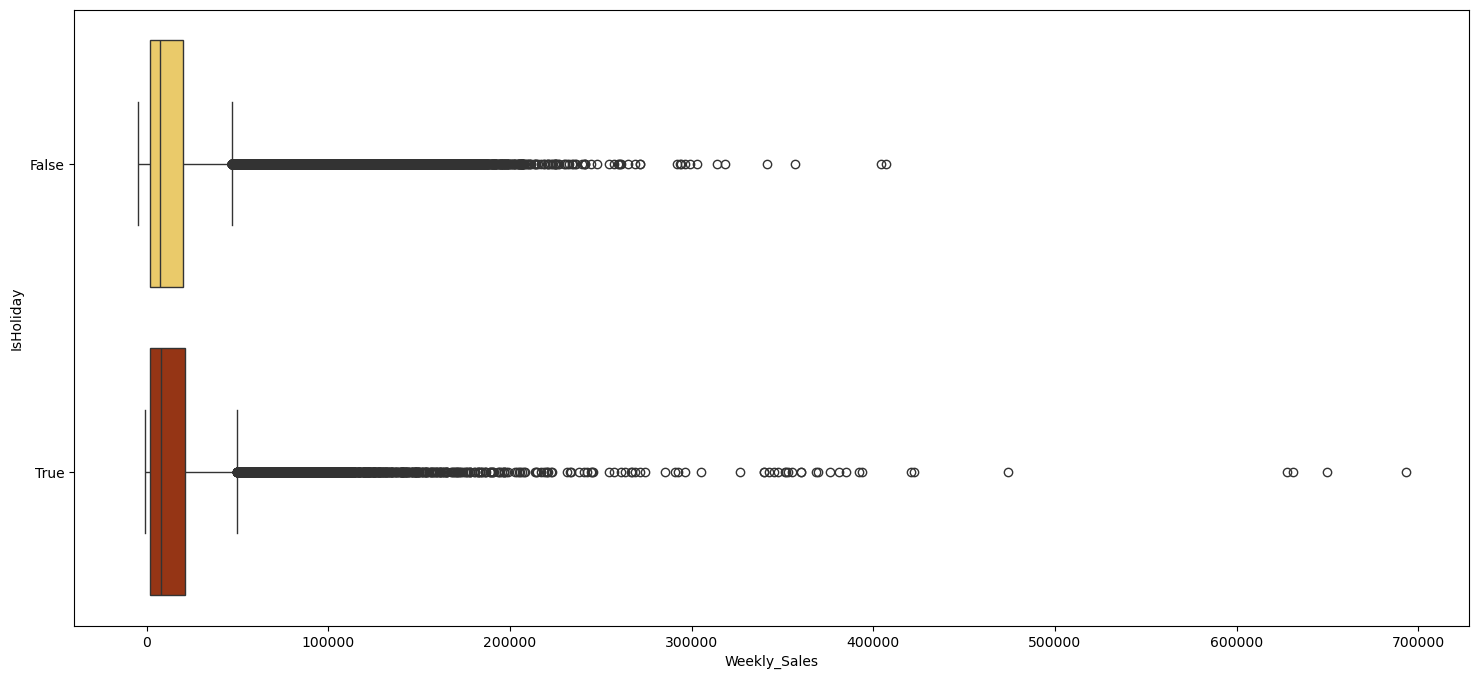

In [68]:
#Visualizing the Effect of Holidays on Weekly Sales

sns.boxplot(x='Weekly_Sales', y='IsHoliday', data=df, orient='h', palette='afmhot_r')  # Effect of IsHoliday on Weekly Sales
plt.show()

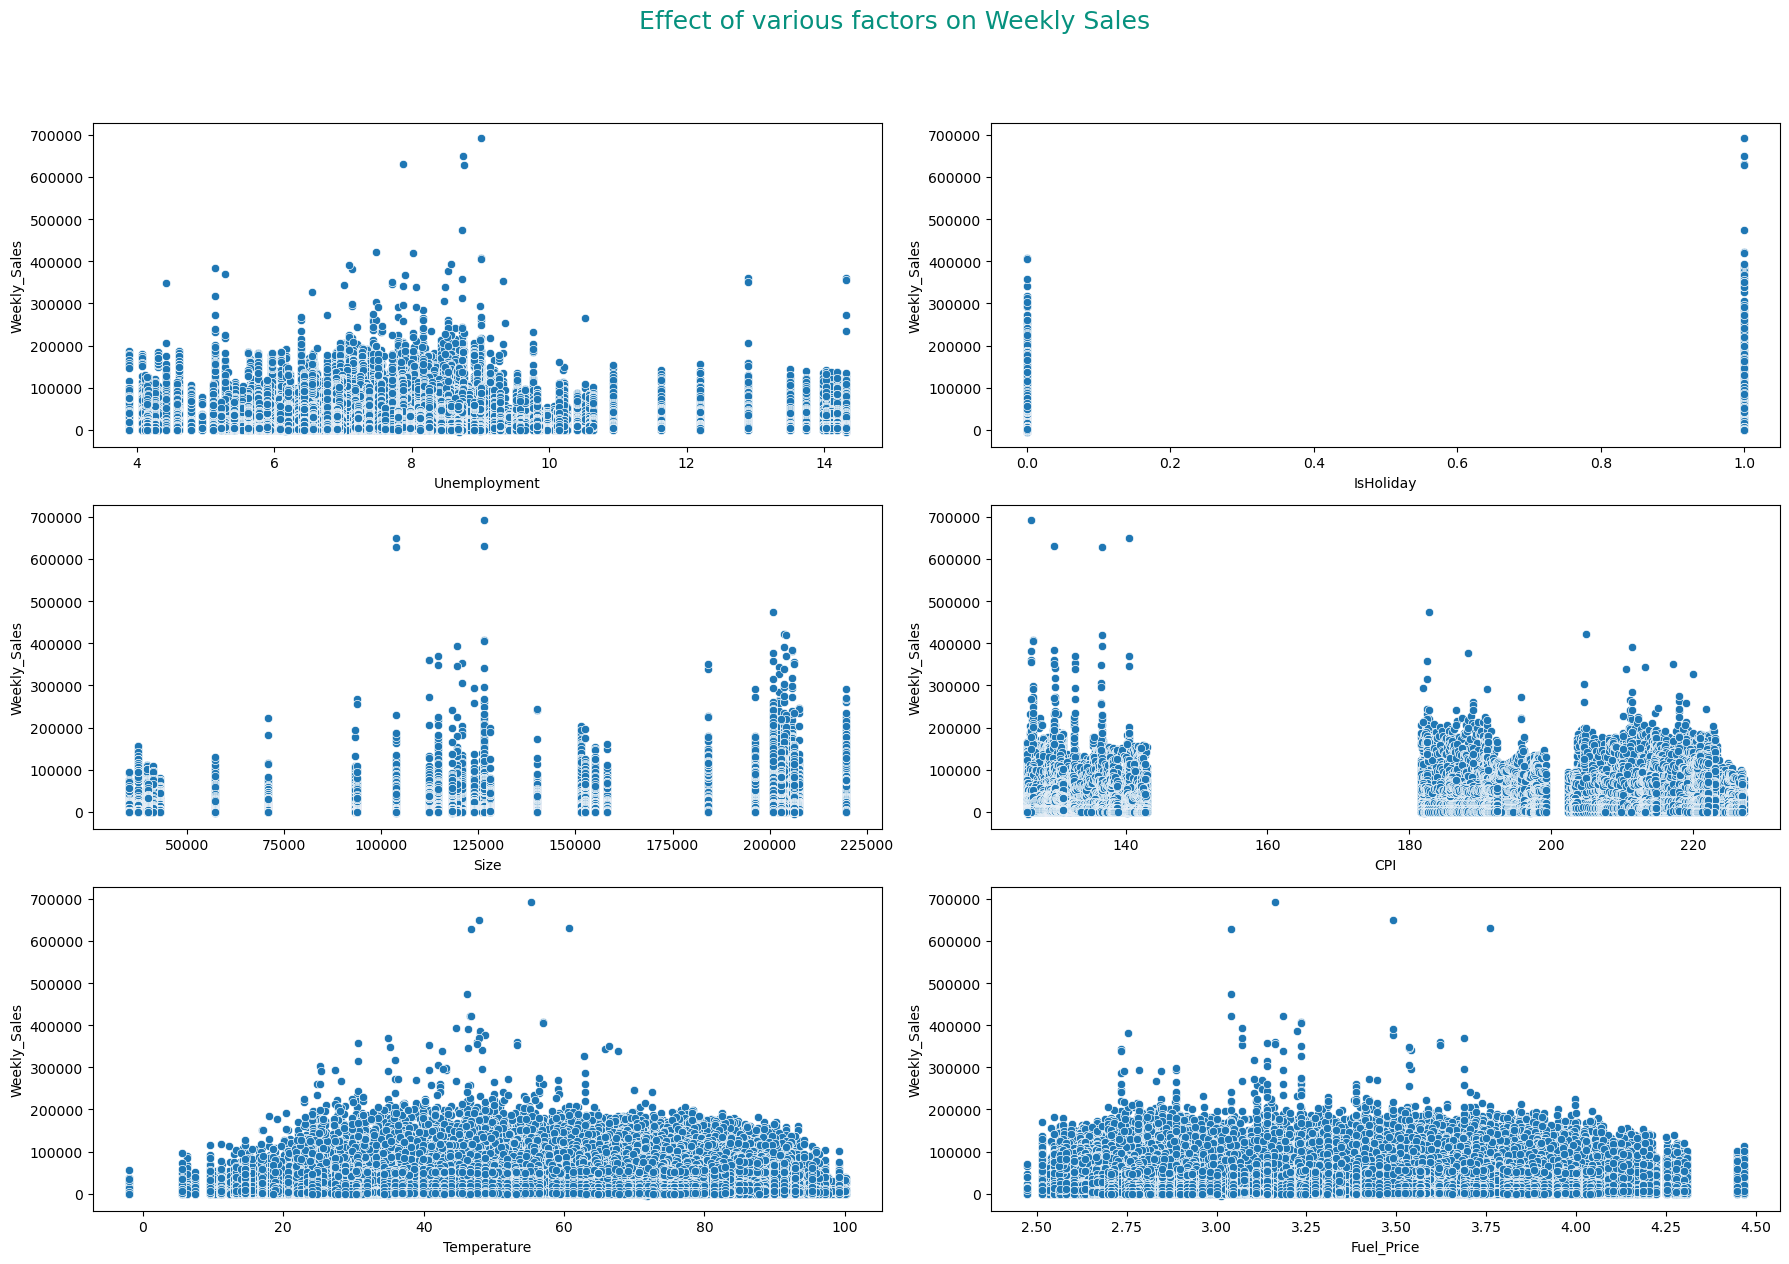

In [69]:
#Visualizing the Effect of Various Factors on Weekly Sales

fig, axes = plt.subplots(3,2,figsize=(18,12))
ax_index = [(i,j) for i in range(3) for j in range(2)]
index_number = 0
fig.suptitle('Effect of various factors on Weekly Sales',fontsize=18, color = '#06917e', y = 1.05)
for i in ['Unemployment','IsHoliday','Size','CPI','Temperature','Fuel_Price']:
    sns.scatterplot(x=i, y='Weekly_Sales', data=df, ax=axes[ax_index[index_number]], palette='afmhot_r')
    index_number += 1
    plt.tight_layout()

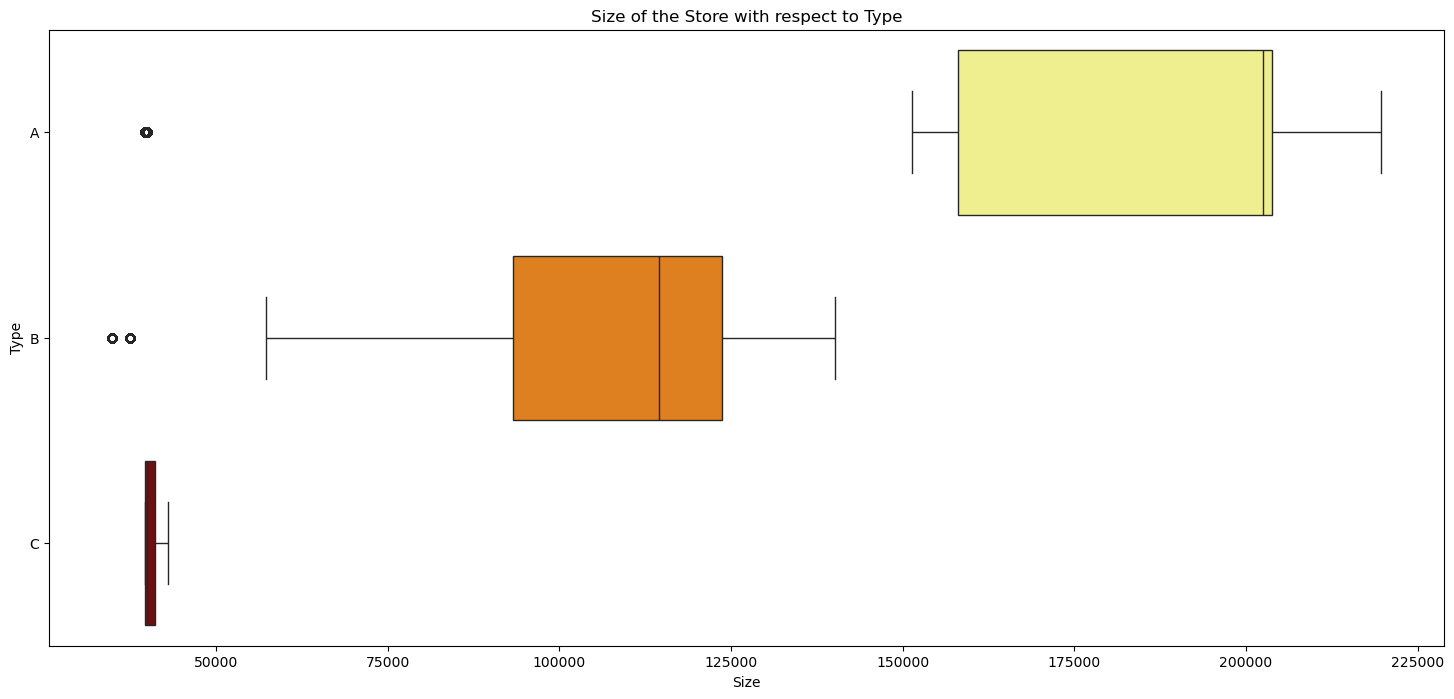

In [70]:
#Visualizing the Size of the Store with Respect to Type

sns.boxplot(x='Size', y='Type', data=df, palette='afmhot_r')
plt.title('Size of the Store with respect to Type')
plt.show()

In [71]:
#Calculating the Median Size for Different Store Types

TypewiseSize = df.groupby(by='Type')['Size']
print("Median Size for Type A Stores --> ",TypewiseSize.get_group('A').median())
print("Median Size for Type B Stores --> ",TypewiseSize.get_group('B').median())
print("Median Size for Type C Stores --> ",TypewiseSize.get_group('C').median())

Median Size for Type A Stores -->  202505.0
Median Size for Type B Stores -->  114533.0
Median Size for Type C Stores -->  39910.0


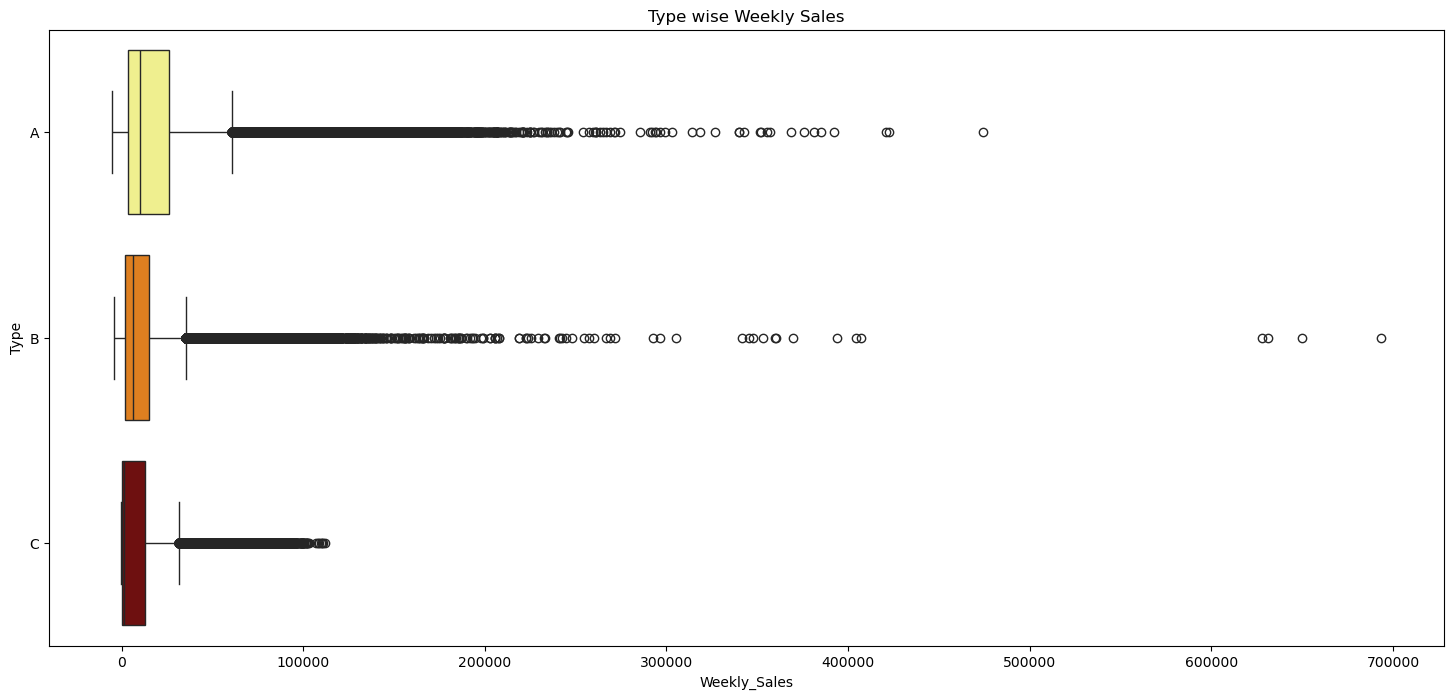

In [72]:
#Visualizing Type-wise Weekly Sales

sns.boxplot(y='Type',x='Weekly_Sales', data=df, orient='h', palette='afmhot_r')
plt.title('Type wise Weekly Sales')
plt.show()

In [73]:
#Calculating the Median Weekly Sales for Different Store Types

TypewiseSales = df.groupby(by='Type')['Weekly_Sales']
print("Median Weekly Sales for Type A Stores --> ",TypewiseSales.get_group('A').median())
print("Median Weekly Sales for Type B Stores --> ",TypewiseSales.get_group('B').median())
print("Median Weekly Sales for Type C Stores --> ",TypewiseSales.get_group('C').median())

Median Weekly Sales for Type A Stores -->  10105.17
Median Weekly Sales for Type B Stores -->  6187.87
Median Weekly Sales for Type C Stores -->  1149.67


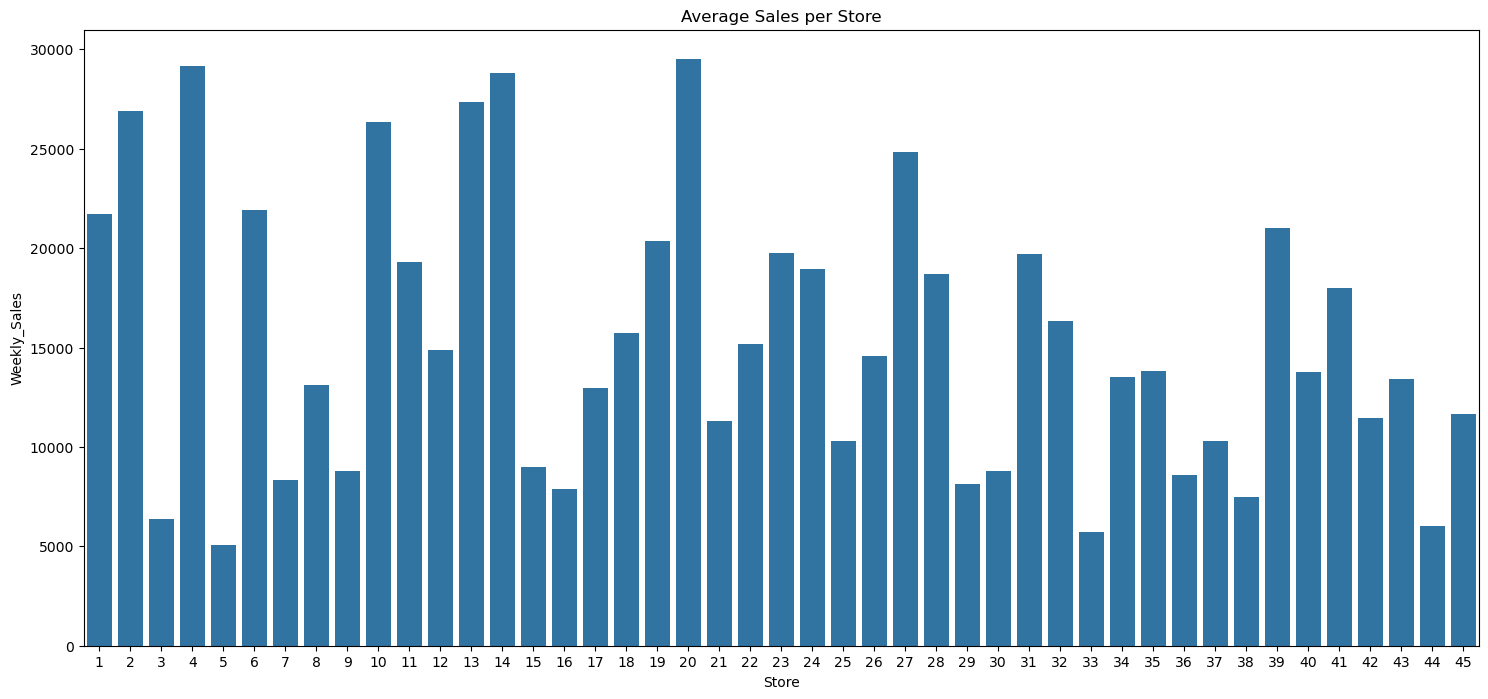

In [74]:
#Average Sales per stores

avg_sales_per_store = df.groupby(by='Store')['Weekly_Sales'].mean()
sns.barplot(x = avg_sales_per_store.index, y=avg_sales_per_store)
plt.title('Average Sales per Store')
plt.show()

In [75]:
avg_sales_per_store.sort_values(ascending = False).head()  # Top 5 most average weekly sales stores.

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
Name: Weekly_Sales, dtype: float64

In [76]:
avg_sales_per_store.sort_values(ascending = False).tail()  # Bottom 5 less average weekly sales stores.

Store
38    7492.478460
3     6373.033983
44    6038.929814
33    5728.414053
5     5053.415813
Name: Weekly_Sales, dtype: float64

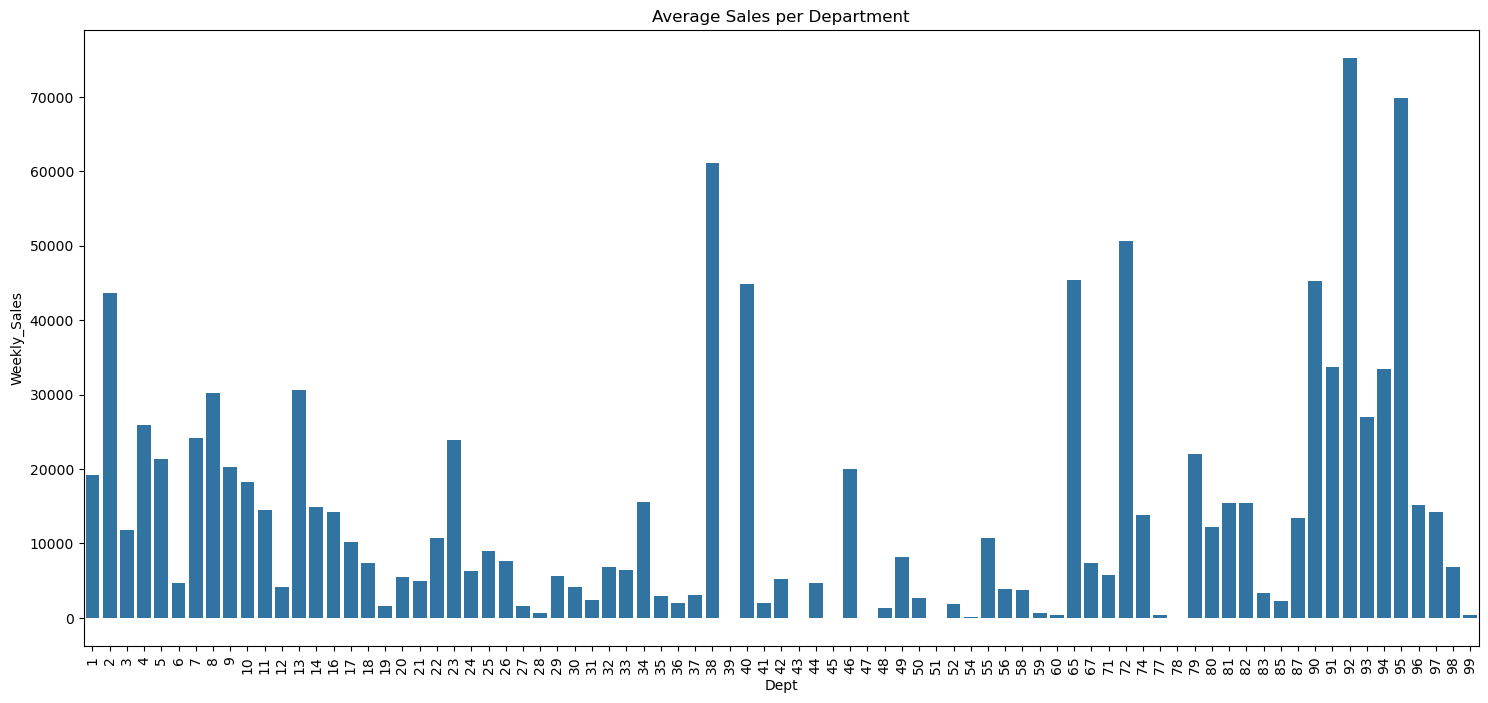

In [77]:
#Average Sales per Department

avg_sales_per_dept = df.groupby(by='Dept')['Weekly_Sales'].mean()
sns.barplot(x = avg_sales_per_dept.index, y=avg_sales_per_dept)
plt.title('Average Sales per Department')
plt.xticks(rotation = 90)
plt.show()

In [78]:
avg_sales_per_dept.sort_values().head(6)  # Bottom 6 departments with least average weekly sales. 

Dept
47    -7.682554
43     1.193333
78     7.296638
39    11.123750
51    21.931729
45    23.211586
Name: Weekly_Sales, dtype: float64

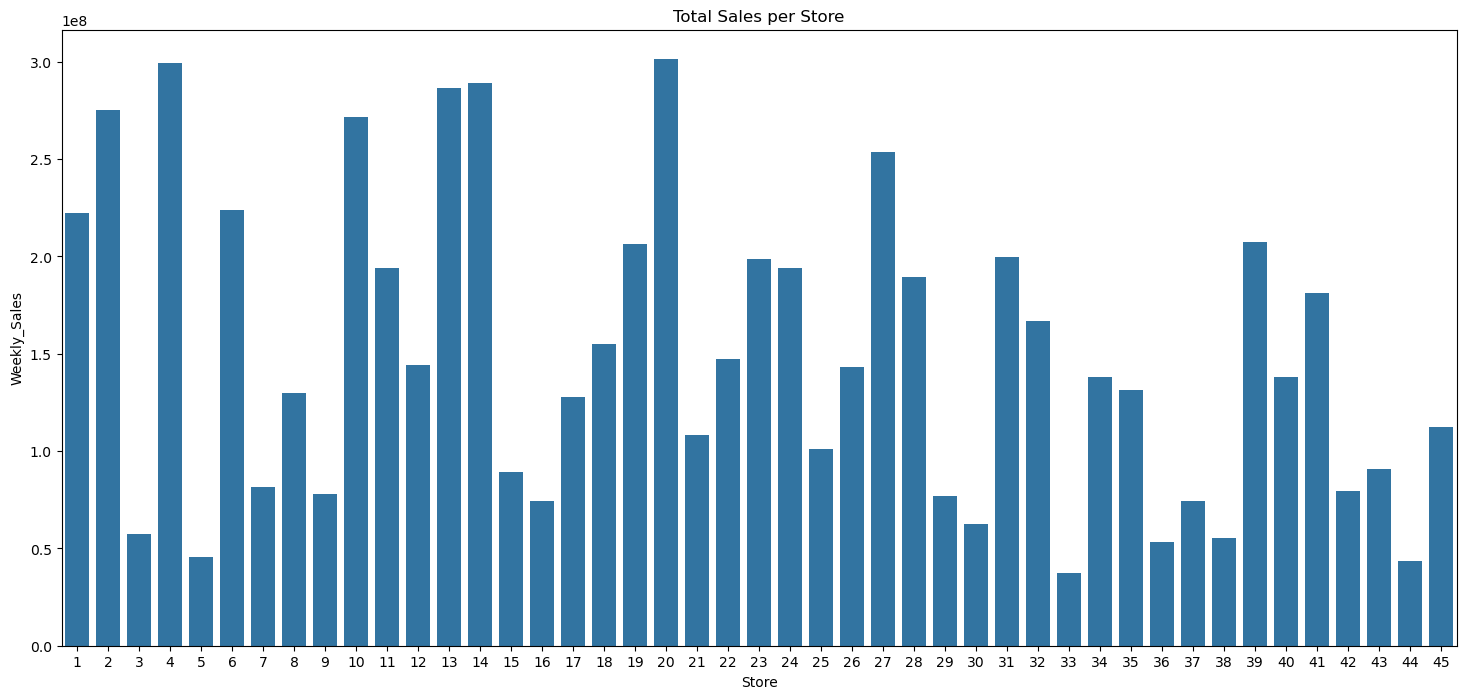

In [79]:
#Total Sales per stores

total_sales_per_store = df.groupby(by='Store')['Weekly_Sales'].sum()
sns.barplot(x = total_sales_per_store.index, y=total_sales_per_store)
plt.title('Total Sales per Store')
plt.show()

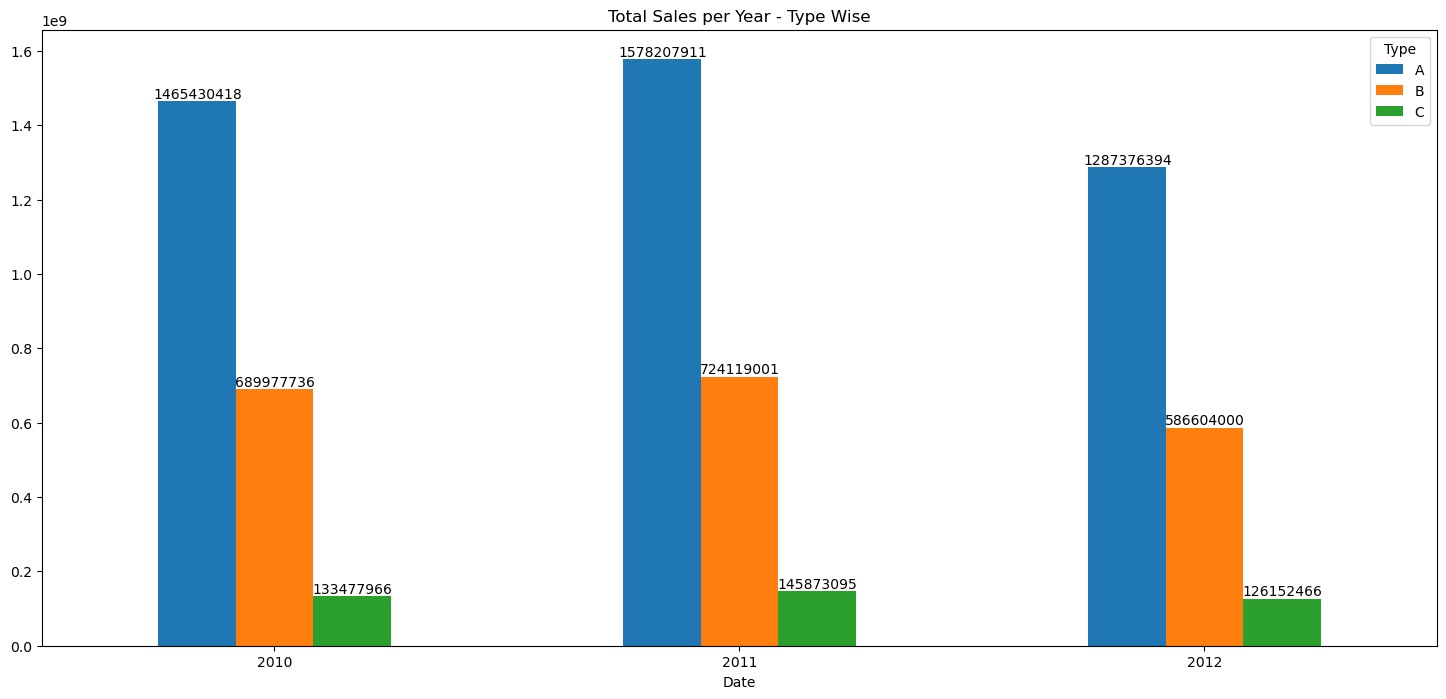

In [80]:
#Visualizing Total Sales per Year by Store Type

total_sales_per_year = df.groupby(by=[df['Date'].dt.year, 'Type'])['Weekly_Sales'].sum()
g = total_sales_per_year.unstack().plot(kind='bar')
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.085, p.get_height()),ha='center', va='bottom',color= 'black')
plt.title('Total Sales per Year - Type Wise')
plt.xticks(rotation=0)
plt.show()

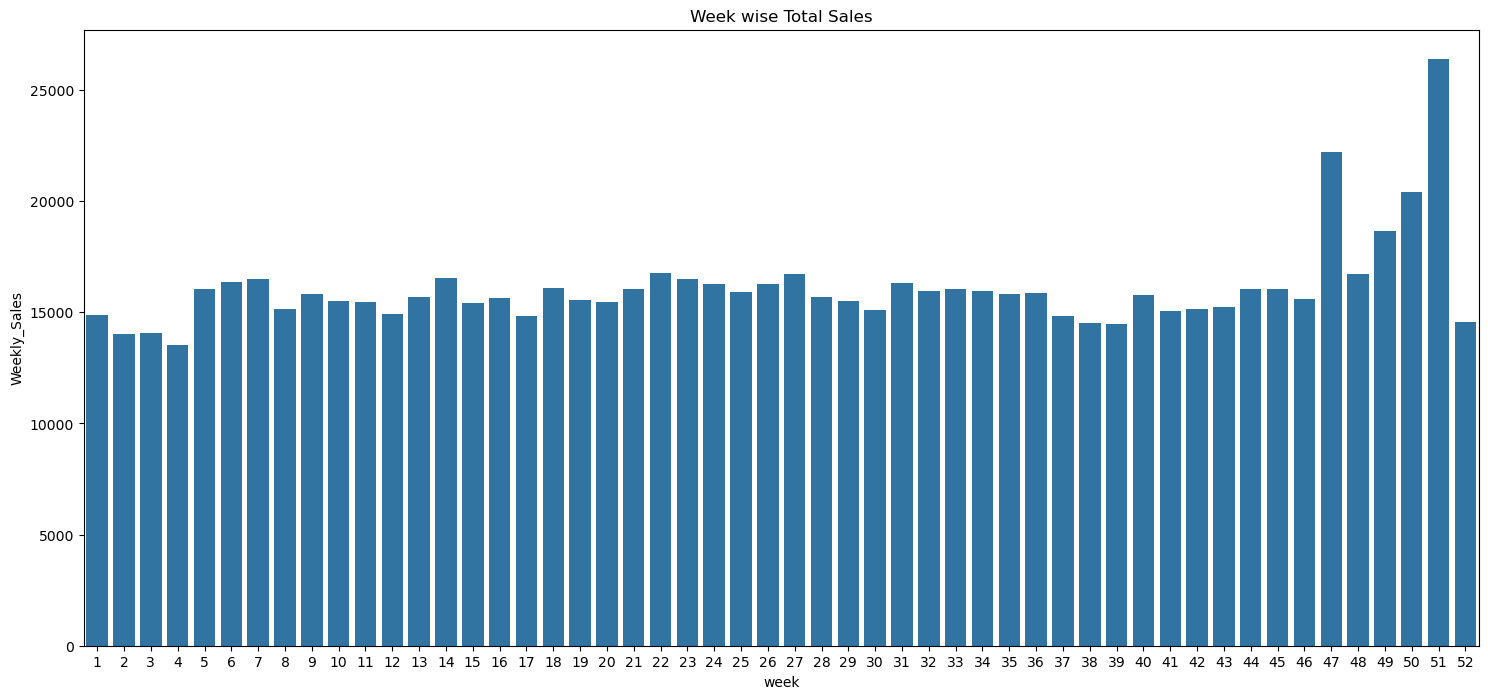

In [81]:
#Visualizing Week-wise Total Sales

sns.barplot(x=df['Date'].dt.isocalendar().week, y="Weekly_Sales", data=df, ci=None)
plt.title('Week wise Total Sales')
plt.show()

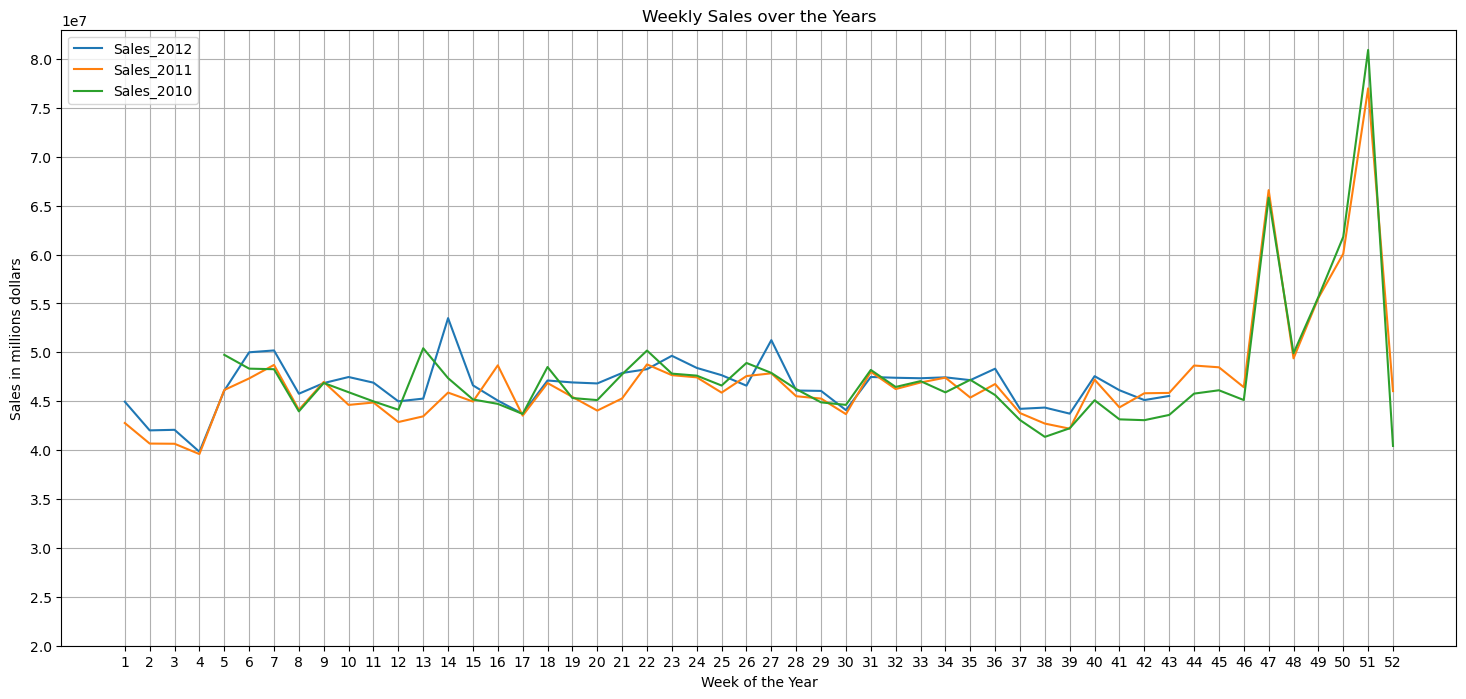

In [82]:
#Visualizing Weekly Sales over the Years (2010-2012)

df_2010 = df.loc[ (df['Date'].dt.year==2010), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()
df_2011 = df.loc[ (df['Date'].dt.year==2011), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()
df_2012 = df.loc[ (df['Date'].dt.year==2012), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()

a10 = pd.DataFrame(data = {'Week_num':df_2010.index.isocalendar().week , 'Sales_2010':df_2010['Weekly_Sales']})
a11 = pd.DataFrame(data = {'Week_num':df_2011.index.isocalendar().week , 'Sales_2011':df_2011['Weekly_Sales']})
a12 = pd.DataFrame(data = {'Week_num':df_2012.index.isocalendar().week , 'Sales_2012':df_2012['Weekly_Sales']})

x = pd.merge(a11, a10, how='outer', on='Week_num')
y = pd.merge(a12, x, how='outer', on='Week_num')

for i in y.columns[1:]:
    plt.plot(y['Week_num'], y[i], label=i)
plt.ylabel("Sales in millions dollars")
plt.xlabel("Week of the Year")
plt.xticks(np.arange(1,53))
plt.yticks(np.arange(20000000, 85000000, 5000000))
plt.title('Weekly Sales over the Years')
plt.legend()
plt.grid()
plt.show()

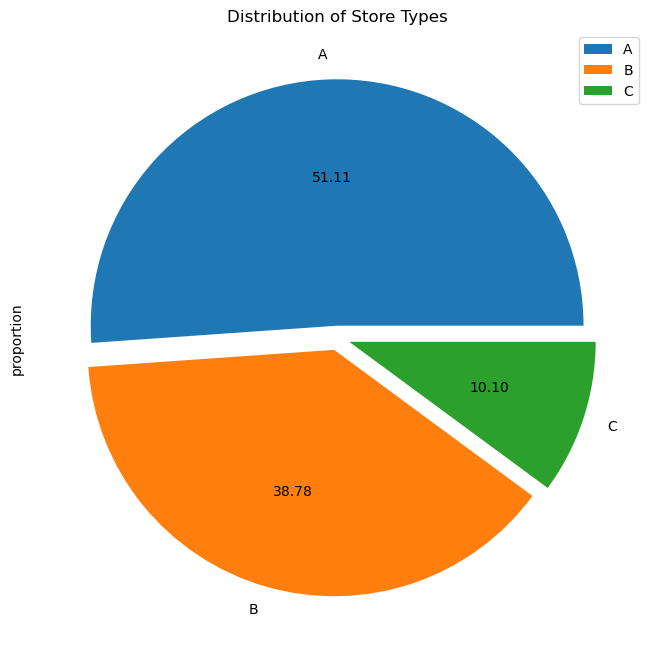

In [83]:
#Visualizing Weekly Sales over the Years (2010-2012)

df['Type'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f', explode=[0.05,0.05,0.05])
plt.legend(df['Type'].value_counts(normalize=True).index, loc = 'upper right')
plt.title('Distribution of Store Types')
plt.show()

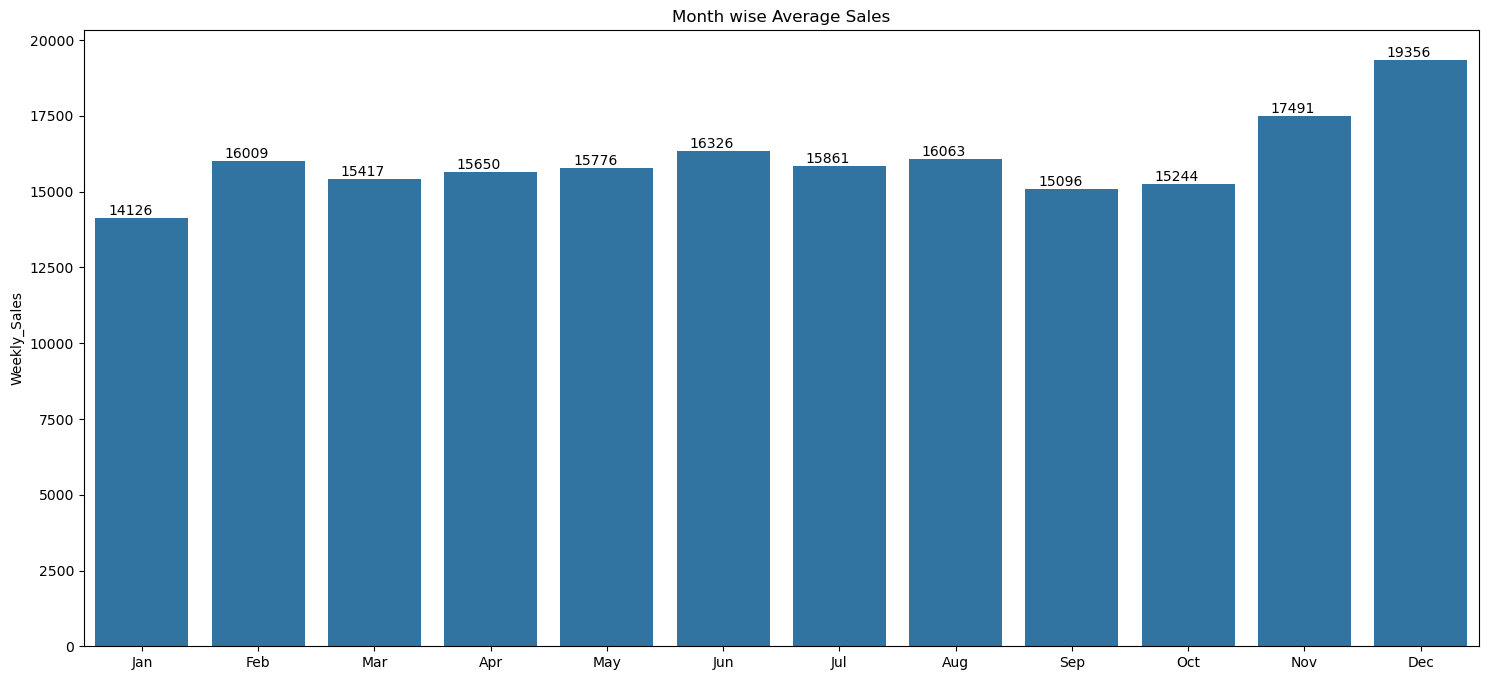

In [84]:
#Visualizing Month-wise Average Sales

month_wise_avg_sales=df.groupby(df['Date'].dt.month)['Weekly_Sales'].mean()
plt.title('Month wise Average Sales')
g = sns.barplot(x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], y=month_wise_avg_sales)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')